In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uncertainties as unc
import uncertainties.unumpy as unp

import seaborn as sns
sns.set(color_codes=True)

from src import shiller

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
shiller.stock_returns.head()

1871.0         NaN
1872.0    0.148148
1873.0    0.113503
1874.0   -0.025751
1875.0    0.039648
dtype: float64

In [11]:
shiller.stock_increase.head()

1871.0     NaN
1872.0    0.72
1873.0    0.58
1874.0   -0.12
1875.0    0.18
dtype: float64

In [12]:
shiller.inflation.head()

1871.0         NaN
1872.0    0.015041
1873.0    0.022057
1874.0   -0.046157
1875.0   -0.074374
Name: CPI, dtype: float64

In [2]:
from src import simulation

histories = simulation.run_histories(yearly_expense=50000.00, starting_assets=500000.00, stock_fraction=0.5,
                  starting_age=65, state_abbrev='IA', demographic_group='white female', n_mc=10000)

In [3]:
histories[:2]

[array([500000.        , 421926.12657372, 368824.85055965, 336606.49712718,
        337892.12633052, 291520.27291578, 229825.883739  , 167094.10159995,
         88663.80052442,  34674.89882692, -14078.47714885]),
 array([500000.        , 477525.04911253, 489975.29021133, 502242.28744046,
        489016.87048121, 494748.30340497, 383150.42636705, 341033.98390152,
        316302.00390723, 236982.65530456, 179875.41267723, 114852.10703741,
         45047.91558185, -26327.25658972])]

In [4]:
final_assets = []
for i in range(loop):
    final_assets.append(histories[i][-1])

final_assets = np.array(final_assets)

run_out_of_money_hist = np.array(final_assets < 0.0, dtype=np.float64)
run_out_of_money = unc.ufloat(run_out_of_money_hist.mean(),
                              run_out_of_money_hist.std() / np.sqrt(loop))

print(' Chance of running out of money is {:%}'.format(run_out_of_money))

run_out_of_money

NameError: name 'loop' is not defined

Text(0,0.5,'Remaining assets (million USD)')

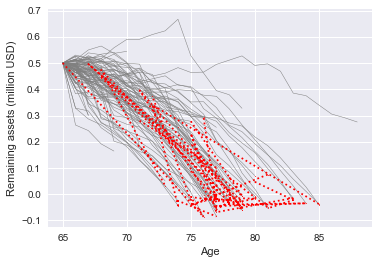

In [74]:
# Plot of asset-over-lifetime histories
plt.figure()

final_ages = []
final_assets = []
for i in range(loop):
    y = histories[i] / 1e6
    x = np.arange(starting_age, starting_age+y.size)
    plt.plot(x, y, color='gray', linewidth=0.5)

    final_assets.append(y[-1])
    final_ages.append(x[-1])

plt.plot(final_ages, final_assets, color='red', ls=':',
         marker='.', markersize=1.5)

plt.xlabel('Age')
plt.ylabel('Remaining assets (million USD)')

In [65]:
final_ages = np.array(final_ages)

max_age = 110
bins = np.linspace(int(starting_age)-0.5, max_age+0.5, max_age-starting_age+2)

In [70]:
final_ages

array([67, 69, 77, 71, 79, 75, 77, 67, 83, 77, 75, 77, 75, 68, 80, 66, 68,
       79, 70, 71, 67, 78, 77, 72, 73, 76, 81, 75, 76, 77, 75, 78, 76, 68,
       70, 66, 72, 75, 79, 70, 66, 74, 76, 77, 72, 65, 76, 75, 78, 68, 73,
       78, 78, 80, 77, 67, 71, 77, 77, 77, 74, 85, 67, 78, 81, 68, 77, 89,
       80, 83, 81, 80, 75, 79, 76, 68, 78, 78, 84, 77, 76, 74, 79, 72, 80,
       74, 75, 72, 71, 66, 77, 79, 67, 79, 74, 85, 72, 74, 74, 77])

Text(0,0.5,'Probability')

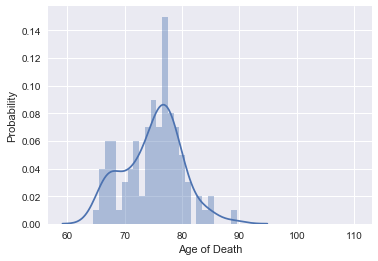

In [71]:
sns.distplot(final_ages, bins=bins)

plt.xlabel('Age of Death')
plt.ylabel('Probability')